<h1><center> CSC8634: Cloud Computing </center></h1>

<h3><center>Performance evaluation of Terapixel rendering in Cloud (Super) computing</center></h3>

#### 1. Introduction:
    
<html>
<head>
<style>
.p1 {
  font-family: "Times New Roman", Times, serif;
}
</style>
</head>
<body>
<p class="p1"> Exploratory Data Analysis (EDA) is a method of revealing data hidden details and use it for further analyzing and summarizing data sets, typically with the intention of locating patterns, connections, and insights within the data. This type of analysis is often the first step in the data science process, and it involves using various techniques such as visualization, and statistical analysis. data cleaning is performed to refine the given raw dataset into useful information to understand the characteristics of the data. The goal of EDA is to generate hypotheses and identify potential issues and insights with the data.</p>
</body>
</html>
   

In [30]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [31]:
#importing the Data
chk_pt=pd.read_csv('C:/Users/Akash/OneDrive/Desktop/Cloud Computing/application-checkpoints.csv')
task_xy=pd.read_csv('C:/Users/Akash/OneDrive/Desktop/Cloud Computing/task-x-y.csv')
gpu=pd.read_csv('C:/Users/Akash/OneDrive/Desktop/Cloud Computing/gpu.csv')

In [32]:
#chk_pt table information
chk_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660400 entries, 0 to 660399
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  660400 non-null  object
 1   hostname   660400 non-null  object
 2   eventName  660400 non-null  object
 3   eventType  660400 non-null  object
 4   jobId      660400 non-null  object
 5   taskId     660400 non-null  object
dtypes: object(6)
memory usage: 30.2+ MB


In [33]:
#task_xy table information
task_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65793 entries, 0 to 65792
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   taskId  65793 non-null  object
 1   jobId   65793 non-null  object
 2   x       65793 non-null  int64 
 3   y       65793 non-null  int64 
 4   level   65793 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ MB


In [34]:
#gpu table information
gpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543681 entries, 0 to 1543680
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       1543681 non-null  object 
 1   hostname        1543681 non-null  object 
 2   gpuSerial       1543681 non-null  int64  
 3   gpuUUID         1543681 non-null  object 
 4   powerDrawWatt   1543681 non-null  float64
 5   gpuTempC        1543681 non-null  int64  
 6   gpuUtilPerc     1543681 non-null  int64  
 7   gpuMemUtilPerc  1543681 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 94.2+ MB


In [35]:
chk_pt.describe()

timestamp                                hostname  \
count                     660400                                  660400   
unique                    363555                                    1024   
top     2018-11-08T07:41:31.776Z  0d56a730076643d585f77e00d2d8521a00000P   
freq                          18                                    1240   

        eventName eventType                                            jobId  \
count      660400    660400                                           660400   
unique          5         2                                                3   
top     Uploading     START  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
freq       132080    330200                                           657810   

                                      taskId  
count                                 660400  
unique                                 65793  
top     42a5658f-13ec-461f-8f0b-dc05b2be445a  
freq                                      20

In [36]:
#Checking for any Duplicates in each table
chk_pt.duplicated().sum()

2470

In [37]:
task_xy.duplicated().sum()

0

In [38]:
gpu.duplicated().sum()

9

In [39]:
#Dropping the duplicates from all the table.
Application_chkPt=chk_pt.drop_duplicates()

In [40]:
Task_Data=task_xy.drop_duplicates()

In [41]:
Task_Data.describe()

x             y         level
count  65793.000000  65793.000000  65793.000000
mean     127.031143    127.031143     11.984314
std       74.135963     74.135963      0.250965
min        0.000000      0.000000      4.000000
25%       63.000000     63.000000     12.000000
50%      127.000000    127.000000     12.000000
75%      191.000000    191.000000     12.000000
max      255.000000    255.000000     12.000000

In [42]:
GPU_Data=gpu.drop_duplicates()
GPU_Data['gpuUUID'].unique().size

1024

In [43]:
Application_chkPt.describe()

timestamp                                hostname  \
count                     657930                                  657930   
unique                    363555                                    1024   
top     2018-11-08T07:41:31.776Z  8b6a0eebc87b4cb2b0539e81075191b900000D   
freq                          18                                     710   

        eventName eventType                                            jobId  \
count      657930    657930                                           657930   
unique          5         2                                                3   
top     Uploading     START  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
freq       131586    328965                                           655360   

                                      taskId  
count                                 657930  
unique                                 65793  
top     c3cf2924-0bc0-47c0-902b-a3c877bb881b  
freq                                      10

In [44]:
Application_chkPt['timestamp']=Application_chkPt['timestamp'].apply(lambda x: pd.Timestamp(x))
GPU_Data['timestamp']=GPU_Data['timestamp'].apply(lambda x: pd.Timestamp(x))

In [45]:
#Splitting based on start and end eventType and merging the table together with two new columsn showing the start and end time of each event
CheckPointTBL=Application_chkPt[Application_chkPt['eventType']=="START"].merge(Application_chkPt[Application_chkPt['eventType']=="STOP"],how='left',on=['hostname','eventName','jobId','taskId'],suffixes=('_EventStartTime','_EventStopTime'))
CheckPointTBL=CheckPointTBL.drop(columns=["eventType_EventStartTime","eventType_EventStopTime"])
CheckPointTBL['EventTimeTaken']=CheckPointTBL['timestamp_EventStopTime']-CheckPointTBL['timestamp_EventStartTime']
CheckPointTBL['EventTimeTaken']=CheckPointTBL['EventTimeTaken'].dt.total_seconds()
CheckPointTBL.sort_values(by=['hostname'], inplace = True)
CheckPointTBL

timestamp_EventStartTime  \
190313 2018-11-08 08:16:43.895000+00:00   
283469 2018-11-08 07:47:22.860000+00:00   
283468 2018-11-08 07:47:22.863000+00:00   
100120 2018-11-08 08:06:41.657000+00:00   
100049 2018-11-08 08:06:41.657000+00:00   
...                                 ...   
218933 2018-11-08 07:43:33.460000+00:00   
218938 2018-11-08 07:43:30.381000+00:00   
277668 2018-11-08 08:00:45.782000+00:00   
194757 2018-11-08 08:19:59.217000+00:00   
229631 2018-11-08 08:13:37.033000+00:00   

                                      hostname      eventName  \
190313  04dc4e9647154250beeee51b866b0715000000         Tiling   
283469  04dc4e9647154250beeee51b866b0715000000  Saving Config   
283468  04dc4e9647154250beeee51b866b0715000000         Render   
100120  04dc4e9647154250beeee51b866b0715000000  Saving Config   
100049  04dc4e9647154250beeee51b866b0715000000    TotalRender   
...                                        ...            ...   
218933  e7adc42d28814e518e9601ac2329c51300001D         Render   
218938  e7adc42d28814e518e9601ac2329c51300001D      Uploading   
277668  e7adc42d28814e518e9601ac2329c51300001D      Uploading   
194757  e7adc42d28814e518e9601ac2329c51300001D         Render   
229631  e7adc42d28814e518e9601ac2329c51300001D      Uploading   

                                                  jobId  \
190313  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
283469  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
283468  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
100120  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
100049  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
...                                                 ...   
218933  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
218938  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
277668  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
194757  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
229631  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                      taskId          timestamp_EventStopTime  \
190313  a164499b-4bb8-42b7-9dc0-cf049b62731e 2018-11-08 08:16:44.897000+00:00   
283469  ffd69831-0ba4-457b-b8a8-e37c49779d94 2018-11-08 07:47:22.863000+00:00   
283468  ffd69831-0ba4-457b-b8a8-e37c49779d94 2018-11-08 07:47:55.554000+00:00   
100120  856b1c9e-8050-4648-b80e-172899cc586d 2018-11-08 08:06:41.659000+00:00   
100049  856b1c9e-8050-4648-b80e-172899cc586d 2018-11-08 08:07:26.785000+00:00   
...                                      ...                              ...   
218933  de595141-d9c8-4e35-ac71-f14d1c9ebe80 2018-11-08 07:44:20.792000+00:00   
218938  472afcae-6f17-43c1-8f1c-8df4116cfed7 2018-11-08 07:43:31.506000+00:00   
277668  4001ba74-396f-4c68-80cb-165723760b6a 2018-11-08 08:00:46.780000+00:00   
194757  4b2777ea-b877-498f-bace-43d867a86046 2018-11-08 08:20:33.780000+00:00   
229631  69bfa379-618d-4d74-b9ad-ddb7d7765837 2018-11-08 08:13:38.079000+00:00   

        EventTimeTaken  
190313           1.002  
283469           0.003  
283468          32.691  
100120           0.002  
100049          45.128  
...                ...  
218933          47.332  
218938           1.125  
277668           0.998  
194757          34.563  
229631           1.046  

[328965 rows x 7 columns]

In [46]:
CheckPointTBL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328965 entries, 190313 to 229631
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   timestamp_EventStartTime  328965 non-null  datetime64[ns, UTC]
 1   hostname                  328965 non-null  object             
 2   eventName                 328965 non-null  object             
 3   jobId                     328965 non-null  object             
 4   taskId                    328965 non-null  object             
 5   timestamp_EventStopTime   328965 non-null  datetime64[ns, UTC]
 6   EventTimeTaken            328965 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(1), object(4)
memory usage: 20.1+ MB


In [47]:
#Table containing the performance time calculated
CheckPointTBL_TR=CheckPointTBL[CheckPointTBL['eventName']=='TotalRender'].groupby(by=['taskId'],as_index=False).sum()
CheckPointTBL_NotTR=CheckPointTBL[CheckPointTBL['eventName']!='TotalRender'].groupby(by=['taskId'],as_index=False).sum()
TaskPerformanceTable=pd.merge(CheckPointTBL_NotTR,CheckPointTBL_TR, how='left', on=['taskId'],suffixes=("_AllTasks","_TotalRender"))

In [48]:
TaskPerformanceTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65793 entries, 0 to 65792
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   taskId                      65793 non-null  object 
 1   EventTimeTaken_AllTasks     65793 non-null  float64
 2   EventTimeTaken_TotalRender  65793 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.0+ MB


In [49]:
#Displaying the TaskIds based on the time taken to perform a event and sorted it in descending order to predict the top 10 bad performing tasks
TaskPerformanceTable_plot=TaskPerformanceTable.sort_values(by='EventTimeTaken_AllTasks',ascending=False).reset_index(drop=True)
TaskPerformanceTable_plot["taskId"] = TaskPerformanceTable_plot["taskId"].apply(lambda x: str(x))
TaskPerformanceTable_plot=TaskPerformanceTable_plot.head(10)
TaskPerf=sns.barplot(data=TaskPerformanceTable_plot, x="taskId", y="EventTimeTaken_AllTasks")
TaskPerf.set_xticklabels(TaskPerf.get_xticklabels(), rotation=30,horizontalalignment='right')
plt.title("Top 10 Bad performing tasks\n\n", size=20 )
plt.show()

In [50]:
TaskPerformanceTable_plot

taskId  EventTimeTaken_AllTasks  \
0  ef15022d-f816-4434-b41e-709cb996bc08                   94.695   
1  76fb8e93-c3a6-456c-9661-3b7407800027                   90.351   
2  83064f91-5a19-4526-8673-38ab28dd3ab7                   89.292   
3  a95d501e-d5d5-4fb4-9119-98120bf6f4d5                   83.498   
4  25b410b5-f5ef-4a2f-8b21-29175bca35fc                   82.388   
5  d194b27d-d421-47d3-ae41-eed07a00e8d4                   79.752   
6  f4a61a45-2e92-4aa0-9219-4425ce0ec17e                   77.479   
7  94bfb9b3-80c2-44e7-8869-c29a0007bbe0                   75.919   
8  d01f0571-c929-4bb8-9692-5ef053c1da1d                   75.763   
9  51271d84-a39c-4a33-93c0-eda4648ad5bf                   75.555   

   EventTimeTaken_TotalRender  
0                      93.697  
1                      89.525  
2                      88.224  
3                      82.511  
4                      81.310  
5                      78.751  
6                      76.317  
7                      74.996  
8                      74.778  
9                      74.718

In [51]:
#GPUs performance table and Host Performance table
HostPerformanceTable =CheckPointTBL.groupby(by=['hostname'], as_index=False).mean()
GPU_HostPerformanceTable =gpu.groupby(by=['hostname'], as_index=False).mean()
HostPerformanceTable

hostname  EventTimeTaken
0     04dc4e9647154250beeee51b866b0715000000       17.936384
1     04dc4e9647154250beeee51b866b0715000001       18.473380
2     04dc4e9647154250beeee51b866b0715000002       16.302615
3     04dc4e9647154250beeee51b866b0715000003       16.524806
4     04dc4e9647154250beeee51b866b0715000004       18.583390
...                                      ...             ...
1019  e7adc42d28814e518e9601ac2329c513000019       18.281344
1020  e7adc42d28814e518e9601ac2329c51300001A       16.304391
1021  e7adc42d28814e518e9601ac2329c51300001B       18.283780
1022  e7adc42d28814e518e9601ac2329c51300001C       18.174616
1023  e7adc42d28814e518e9601ac2329c51300001D       18.480423

[1024 rows x 2 columns]

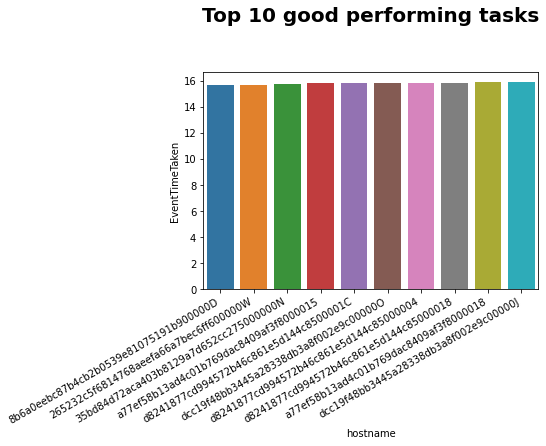

In [52]:
#Displaying the hostname based on the time taken to perform a event and sorted it in ascending order to predict the top 10 good performing tasks

HostPerformanceTable_plot=HostPerformanceTable.sort_values(by='EventTimeTaken',ascending=True).reset_index(drop=True)
HostPerformanceTable_plot["hostname"] = HostPerformanceTable_plot["hostname"].apply(lambda x: str(x))
HostPerformanceTable_plot=HostPerformanceTable_plot.head(10)
HostPerf=sns.barplot(data=HostPerformanceTable_plot, x="hostname", y="EventTimeTaken")
HostPerf.set_xticklabels(HostPerf.get_xticklabels(), rotation=30,horizontalalignment='right')
plt.title("Top 10 good performing tasks\n\n", size=20,fontweight='bold' )
plt.show()

In [55]:
#plot table for host performance
HostPerformanceTable_plot=HostPerformanceTable.sort_values(by='EventTimeTaken',ascending=False).reset_index(drop=True)
HostPerformanceTable_plot

hostname  EventTimeTaken
0     dcc19f48bb3445a28338db3a8f002e9c00000S       19.013569
1     0d56a730076643d585f77e00d2d8521a00001B       19.001125
2     e7adc42d28814e518e9601ac2329c51300000D       18.991756
3     265232c5f6814768aeefa66a7bec6ff6000004       18.938176
4     4a79b6d2616049edbf06c6aa58ab426a00000U       18.933481
...                                      ...             ...
1019  d8241877cd994572b46c861e5d144c8500001C       15.810600
1020  a77ef58b13ad4c01b769dac8409af3f8000015       15.802014
1021  35bd84d72aca403b8129a7d652cc275000000N       15.721789
1022  265232c5f6814768aeefa66a7bec6ff600000W       15.657454
1023  8b6a0eebc87b4cb2b0539e81075191b900000D       15.639893

[1024 rows x 2 columns]

In [56]:
GPUPerformanceTable = GPU_Data[["hostname","gpuUUID","gpuSerial","powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"]].groupby(by=["hostname","gpuUUID","gpuSerial"], as_index=False).mean()
PerformanceTable = pd.merge(HostPerformanceTable,GPUPerformanceTable,on='hostname')
PerformanceTable_1 = pd.merge(HostPerformanceTable,GPU_HostPerformanceTable,on='hostname')
#GPU Performance table
PerformanceTable_1

hostname  EventTimeTaken     gpuSerial  \
0     04dc4e9647154250beeee51b866b0715000000       17.936384  3.232171e+11   
1     04dc4e9647154250beeee51b866b0715000001       18.473380  3.236170e+11   
2     04dc4e9647154250beeee51b866b0715000002       16.302615  3.236170e+11   
3     04dc4e9647154250beeee51b866b0715000003       16.524806  3.236170e+11   
4     04dc4e9647154250beeee51b866b0715000004       18.583390  3.232171e+11   
...                                      ...             ...           ...   
1019  e7adc42d28814e518e9601ac2329c513000019       18.281344  3.201181e+11   
1020  e7adc42d28814e518e9601ac2329c51300001A       16.304391  3.251171e+11   
1021  e7adc42d28814e518e9601ac2329c51300001B       18.283780  3.250170e+11   
1022  e7adc42d28814e518e9601ac2329c51300001C       18.174616  3.251172e+11   
1023  e7adc42d28814e518e9601ac2329c51300001D       18.480423  3.201181e+11   

      powerDrawWatt   gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
0         95.868947  43.525333    63.602667       35.876000  
1         91.813693  40.992000    64.630000       35.510000  
2         82.537798  38.048193    61.548862       30.505355  
3         86.558581  41.576282    60.127249       29.832778  
4         94.292392  39.742838    64.545636       35.549634  
...             ...        ...          ...             ...  
1019      89.386562  39.095270    64.512325       36.449034  
1020      82.943504  37.712858    61.762825       30.990007  
1021      88.354997  38.569046    63.919947       35.593062  
1022      88.411319  37.205863    64.930047       36.289141  
1023      97.399313  39.816000    64.793333       36.607333  

[1024 rows x 7 columns]

In [57]:
#Task performance table for the tiles given
TaskXYPerformanceTable =  pd.merge(Task_Data,TaskPerformanceTable,on='taskId')
TaskXYPerformanceTable = TaskXYPerformanceTable.drop(columns=['taskId','jobId'])
TaskXYPerformanceTable.sort_values(by=['x','y'], inplace=True)
TaskXYPerformanceTable=TaskXYPerformanceTable.reset_index(drop=True)

In [58]:
TaskXYPerformanceTable

x    y  level  EventTimeTaken_AllTasks  EventTimeTaken_TotalRender
0        0    0     12                   25.336                      24.627
1        0    0      4                   53.428                      52.182
2        0    0      8                   44.601                      43.853
3        0    1     12                   43.979                      43.248
4        0    1      8                   25.552                      24.810
...    ...  ...    ...                      ...                         ...
65788  255  251     12                   53.228                      52.156
65789  255  252     12                   45.252                      44.247
65790  255  253     12                   44.069                      43.220
65791  255  254     12                   57.269                      56.228
65792  255  255     12                   37.859                      36.916

[65793 rows x 5 columns]

In [59]:
#segregating the Task performance table based on the levels
TaskXYPerformanceTable_12=TaskXYPerformanceTable[TaskXYPerformanceTable['level']==12].reset_index(drop=True)
TaskXYPerformanceTable_8=TaskXYPerformanceTable[TaskXYPerformanceTable['level']==8].reset_index(drop=True)
TaskXYPerformanceTable_4=TaskXYPerformanceTable[TaskXYPerformanceTable['level']==4].reset_index(drop=True)

In [60]:
#Performance time table for all the events
EventTimeTakenTable_NotTR = CheckPointTBL[CheckPointTBL['eventName']!='TotalRender'].groupby(['eventName'],as_index=False).mean()
EventTimeTakenTable_TR = CheckPointTBL.groupby(['eventName'],as_index=False).mean()
EventTimeTakenTable_NotTR=EventTimeTakenTable_NotTR.sort_values(by=['EventTimeTaken'],ascending=False).reset_index(drop=True)
EventTimeTakenTable_TR=EventTimeTakenTable_TR.sort_values(by=['EventTimeTaken'],ascending=False).reset_index(drop=True)

In [61]:
EventTimeTakenTable_TR

eventName  EventTimeTaken
0    TotalRender       42.604778
1         Render       41.208220
2      Uploading        1.393641
3         Tiling        0.973207
4  Saving Config        0.002476

In [62]:
#Task performance table for tiles of level 12
TaskXYPerformanceTable_12

x    y  level  EventTimeTaken_AllTasks  EventTimeTaken_TotalRender
0        0    0     12                   25.336                      24.627
1        0    1     12                   43.979                      43.248
2        0    2     12                   25.138                      24.413
3        0    3     12                   45.179                      44.470
4        0    4     12                   24.795                      24.060
...    ...  ...    ...                      ...                         ...
65531  255  251     12                   53.228                      52.156
65532  255  252     12                   45.252                      44.247
65533  255  253     12                   44.069                      43.220
65534  255  254     12                   57.269                      56.228
65535  255  255     12                   37.859                      36.916

[65536 rows x 5 columns]

### Exploratory Data Analysis


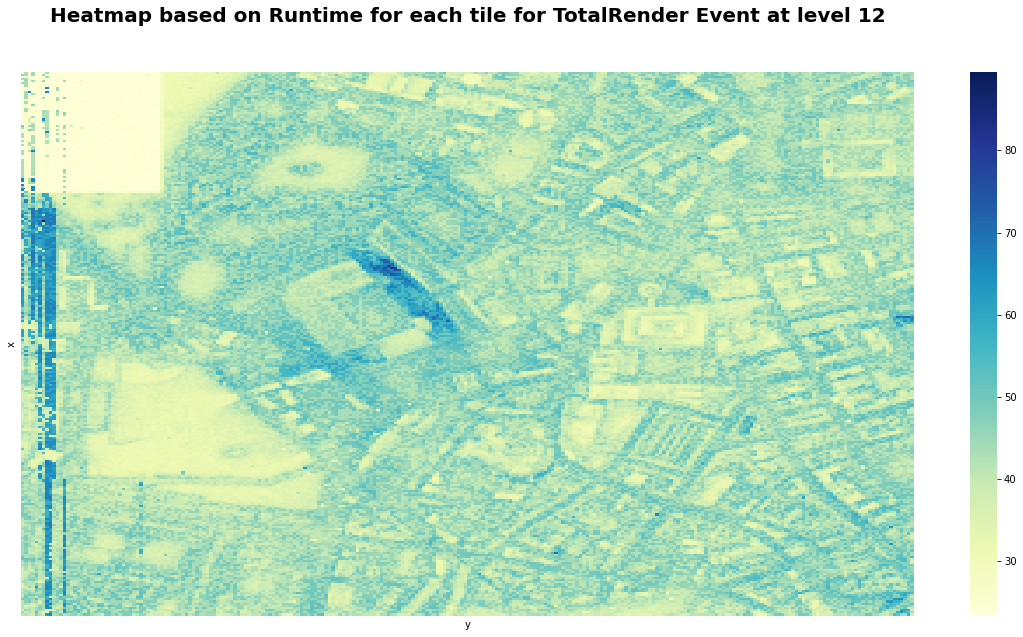

In [63]:
#Heatmap for each tile on all tasks in events except TotalRender Event of level 12
fig, ax = plt.subplots(figsize=(20,10))
glue = TaskXYPerformanceTable_12[["x","y","EventTimeTaken_TotalRender"]].pivot("x", "y", "EventTimeTaken_TotalRender")
ax = sns.heatmap(glue, cmap='YlGnBu', annot=False, xticklabels=False, yticklabels=False)
plt.title("Heatmap based on Runtime for each tile for TotalRender Event at level 12\n\n", size=20,fontweight='bold' )
plt.show()

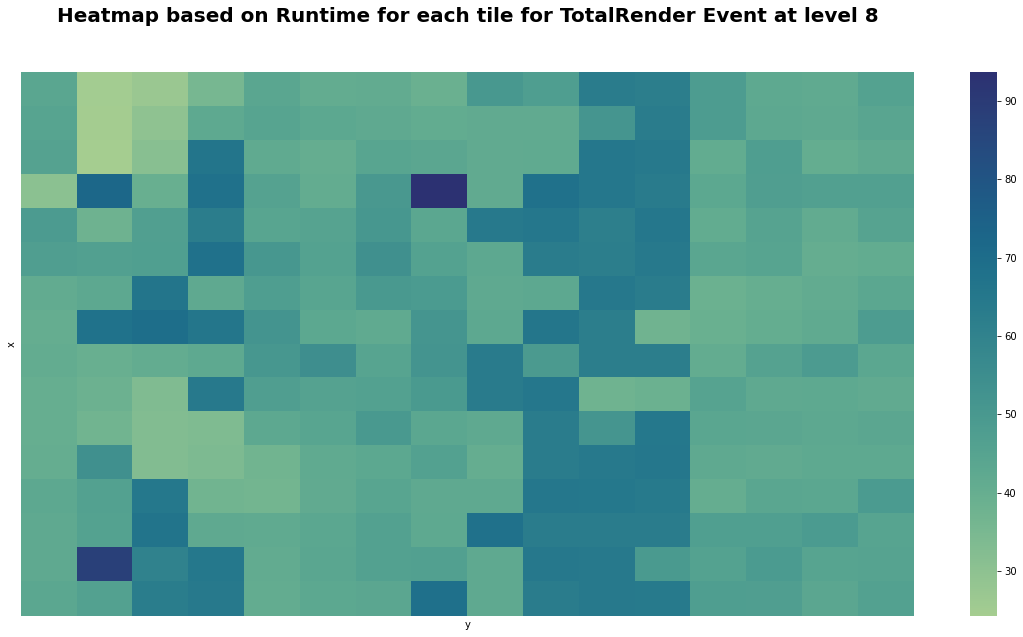

In [64]:
#Heatmap for each tile on all tasks in events except TotalRender Event of level 8
fig, ax = plt.subplots(figsize=(20,10))
glue = TaskXYPerformanceTable_8[["x","y","EventTimeTaken_TotalRender"]].pivot("x", "y", "EventTimeTaken_TotalRender")
ax = sns.heatmap(glue, cmap='crest',annot=False, xticklabels=False, yticklabels=False)
plt.title("Heatmap based on Runtime for each tile for TotalRender Event at level 8\n\n", size=20,fontweight='bold' )
plt.show()

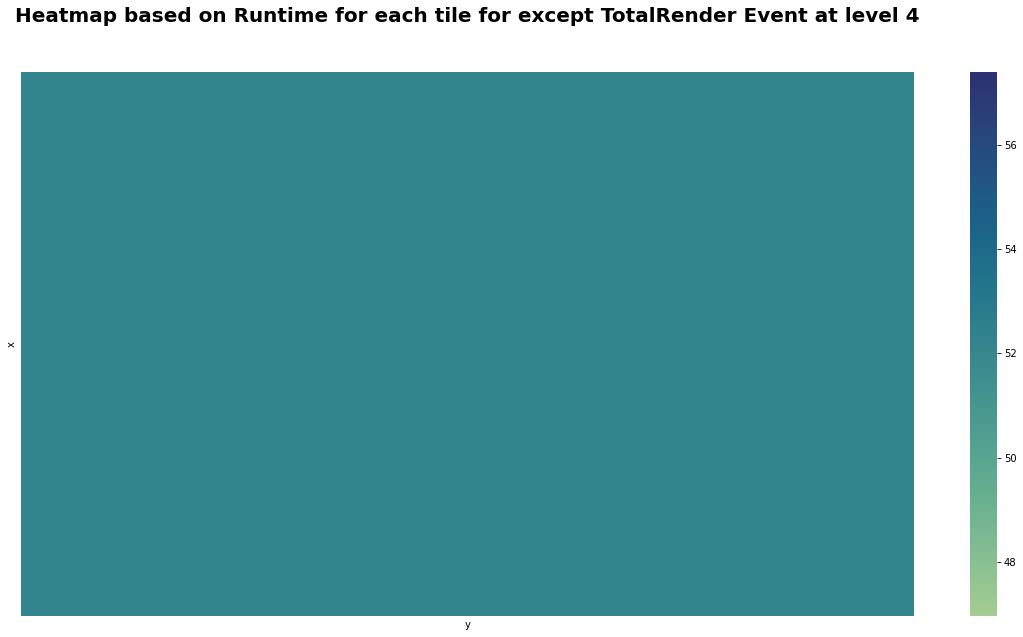

In [65]:
#Heatmap for each tile on all tasks in events except TotalRender Event of level 4
fig, ax = plt.subplots(figsize=(20,10))
glue = TaskXYPerformanceTable_4[["x","y","EventTimeTaken_TotalRender"]].pivot("x", "y", "EventTimeTaken_TotalRender")
ax = sns.heatmap(glue, cmap='crest',annot=False, xticklabels=False, yticklabels=False)
plt.title("Heatmap based on Runtime for each tile for except TotalRender Event at level 4\n\n", size=20,fontweight='bold' )
plt.show()

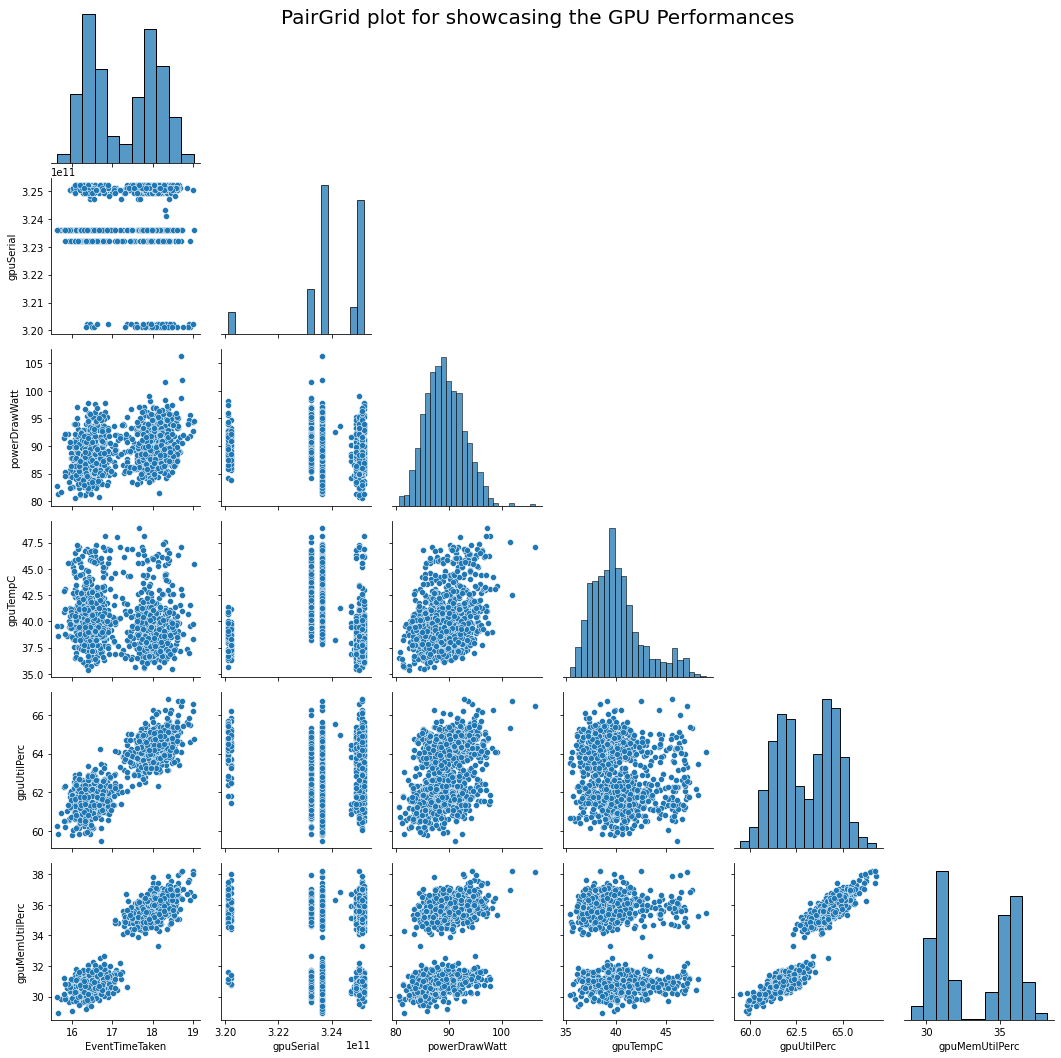

In [66]:
#GPU Table Pair plot matrix 
%matplotlib inline
g = sns.PairGrid(PerformanceTable, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
plt.suptitle('PairGrid plot for showcasing the GPU Performances', fontsize = 20)
plt.show()

## Questions to be answered

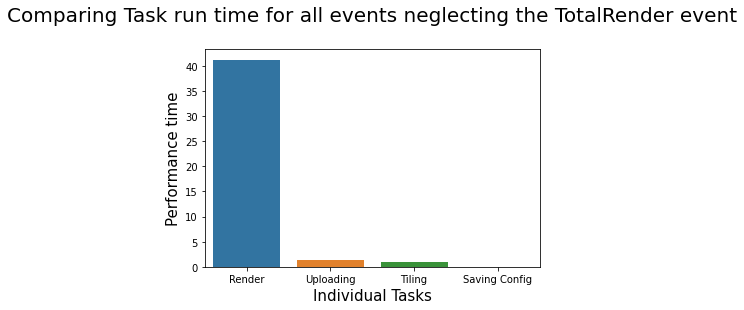

In [67]:
#Comparing Task run time for all events neglecting the TotalRender event
Bar_Task=sns.barplot(data=EventTimeTakenTable_NotTR, x="eventName", y="EventTimeTaken")
#Bar_Task.bar_label(Bar_Task.containers[0])
plt.title("Comparing Task run time for all events neglecting the TotalRender event\n",size=20)
plt.xlabel('Individual Tasks',size=15)
plt.ylabel('Performance time',size=15)
plt.show()

From the below plots and table it can visible that the Render event is the event which dominates its process run time over the other events. The TotalRender time is not taken int consideration because TotalRender run time is sum of all the remaining individual process run time.Thus, we can find that Render is the event that dominates other tasks runtime.

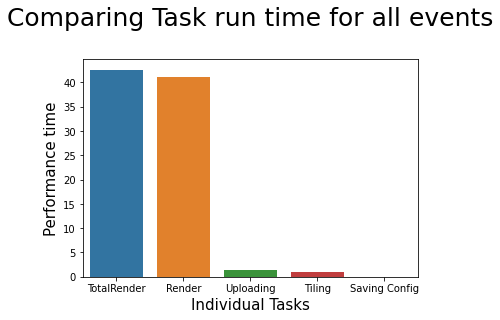

In [68]:
#Comparing Task run time for all the events
%matplotlib inline
Bar_Task_1=sns.barplot(data=EventTimeTakenTable_TR, x="eventName", y="EventTimeTaken")
#Bar_Task_1.bar_label(Bar_Task.containers[0])
plt.title("Comparing Task run time for all events\n",size=25)
plt.xlabel('Individual Tasks',size=15)
plt.ylabel('Performance time',size=15)
plt.show()

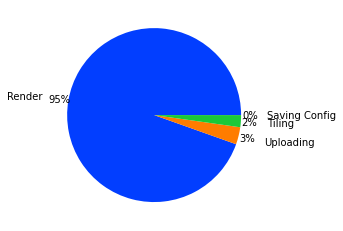

In [69]:
#Pie chart Comparing Task run time for all the events
%matplotlib inline
palette_color = sns.color_palette('bright')
plt.pie(EventTimeTakenTable_NotTR['EventTimeTaken'],colors=palette_color, labels=EventTimeTakenTable_NotTR['eventName'], autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.3)  
# displaying chart
plt.show()

From the below, it is apparent that most of the scatterplot points are scattered between 37.5 °C and 42.5 °C. Once 42.5 is reached the point gets to scatter a little forming some outliers in the plot though it is less in the count. The temperature and the GPU temperature are not linear dependent on each other. It can be clearly seen in the below correlation table for the PerformanceTable being used. There are two clusters formed in the table between 37.5 °C
and 42.5 °C. the time taken varies from over 16 to 17 seconds for the first cluster and 17..5 to 18.5 in the second cluster. there are fewer outliers after 44 °C. Thus, we can infer that GPU Temperature increase gradually with the performance time taken by the event.

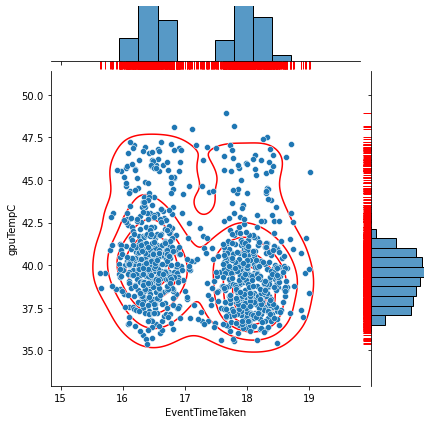

In [70]:
#Joint plot showing the comparison of GPU temperature with the Time taken by the respective event.
Obj1 = sns.jointplot(x='EventTimeTaken', y='gpuTempC', data=PerformanceTable)
# Obj1.fig.suptitle("GPU Temperature and Performance time comparison using Scatterplot and histogram plot\n\n\n")
# Obj1.ax_joint.set_xlabel('Performance time')
# Obj1.ax_joint.set_ylabel('GPU Temperature')

Obj1.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
Obj1.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [71]:
#Correlation matrix for the Performance table
corr = PerformanceTable.corr()
corr.style.background_gradient(cmap='coolwarm')

From the above graph, we can identify that the Power Draw value increase as the Performance time increases. So, we can note that PowerDrawWatt has a significant relationship with Performance time. This relationship is not linear, and it has a significant effect on a few factors such as the load on the system, the event that is being executed, and the hardware components.

Text(0.5, 0.98, 'Comparison of Average Power draw with the calculated Performance time')

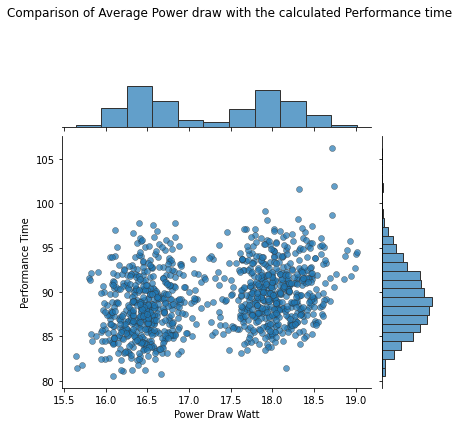

In [72]:
#JointGrid plot for comparing the calculated performance time with the Average power draw taken
gpu_plot = sns.JointGrid(data=PerformanceTable, x="EventTimeTaken", y="powerDrawWatt")
gpu_plot.plot(sns.scatterplot, sns.histplot,alpha=.7, edgecolor=".2")
gpu_plot.set_axis_labels(xlabel='Power Draw Watt', ylabel='Performance Time')
gpu_plot.fig.subplots_adjust(top=.8)
gpu_plot.fig.suptitle('Comparison of Average Power draw with the calculated Performance time')


In [73]:
#Can we quantify the variation in computation requirements for particular tiles?
Task_Tiles =  pd.merge(Task_Data[['taskId','x','y','level']],CheckPointTBL[['hostname','taskId','EventTimeTaken']],on='taskId')
Task_Tiles.sort_values(by=['x','y'], inplace=True)
Tiles_Performance = pd.merge(GPU_HostPerformanceTable,Task_Tiles, on='hostname', how='right')
Tiles_Performance

hostname     gpuSerial  powerDrawWatt  \
0       83ea61ac1ef54f27a3bf7bd0f41ecaa7000001  3.232171e+11      92.993187   
1       83ea61ac1ef54f27a3bf7bd0f41ecaa7000001  3.232171e+11      92.993187   
2       83ea61ac1ef54f27a3bf7bd0f41ecaa7000001  3.232171e+11      92.993187   
3       83ea61ac1ef54f27a3bf7bd0f41ecaa7000001  3.232171e+11      92.993187   
4       83ea61ac1ef54f27a3bf7bd0f41ecaa7000001  3.232171e+11      92.993187   
...                                        ...           ...            ...   
328960  4c72fae95b9147189a0559269a6953ff00000W  3.251172e+11      85.383987   
328961  4c72fae95b9147189a0559269a6953ff00000W  3.251172e+11      85.383987   
328962  4c72fae95b9147189a0559269a6953ff00000W  3.251172e+11      85.383987   
328963  4c72fae95b9147189a0559269a6953ff00000W  3.251172e+11      85.383987   
328964  4c72fae95b9147189a0559269a6953ff00000W  3.251172e+11      85.383987   

         gpuTempC  gpuUtilPerc  gpuMemUtilPerc  \
0       46.725333    61.135333       30.232667   
1       46.725333    61.135333       30.232667   
2       46.725333    61.135333       30.232667   
3       46.725333    61.135333       30.232667   
4       46.725333    61.135333       30.232667   
...           ...          ...             ...   
328960  45.187333    60.056000       29.746667   
328961  45.187333    60.056000       29.746667   
328962  45.187333    60.056000       29.746667   
328963  45.187333    60.056000       29.746667   
328964  45.187333    60.056000       29.746667   

                                      taskId    x    y  level  EventTimeTaken  
0       d9d4da27-5478-44a5-928a-ded80a5b7844    0    0     12          23.333  
1       d9d4da27-5478-44a5-928a-ded80a5b7844    0    0     12           0.003  
2       d9d4da27-5478-44a5-928a-ded80a5b7844    0    0     12          24.627  
3       d9d4da27-5478-44a5-928a-ded80a5b7844    0    0     12           1.291  
4       d9d4da27-5478-44a5-928a-ded80a5b7844    0    0     12           0.709  
...                                      ...  ...  ...    ...             ...  
328960  8c56d915-2430-4470-a409-84bd7f451a13  255  255     12           0.003  
328961  8c56d915-2430-4470-a409-84bd7f451a13  255  255     12          35.928  
328962  8c56d915-2430-4470-a409-84bd7f451a13  255  255     12          36.916  
328963  8c56d915-2430-4470-a409-84bd7f451a13  255  255     12           0.943  
328964  8c56d915-2430-4470-a409-84bd7f451a13  255  255     12           0.985  

[328965 rows x 11 columns]

   level      x      y  EventTimeTaken
0      4    0.0    0.0       21.122000
1      8    7.5    7.5       19.587616
2     12  127.5  127.5       17.227221


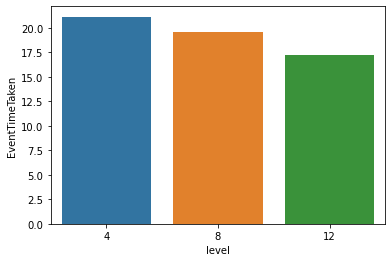

In [74]:
#Bar plot for the task performance table
Tiles_Performance = Tiles_Performance[['x','y','EventTimeTaken','level']].groupby(by=["level"], as_index=False).mean()
print(Tiles_Performance)
sns.barplot(data=Tiles_Performance,x="level",y="EventTimeTaken")
plt.show()

In [75]:
GPU_HostPerformanceTable =PerformanceTable_1.groupby(by=['hostname'], as_index=False).mean()
GPU_HostPerformanceTable

hostname  EventTimeTaken     gpuSerial  \
0     04dc4e9647154250beeee51b866b0715000000       17.936384  3.232171e+11   
1     04dc4e9647154250beeee51b866b0715000001       18.473380  3.236170e+11   
2     04dc4e9647154250beeee51b866b0715000002       16.302615  3.236170e+11   
3     04dc4e9647154250beeee51b866b0715000003       16.524806  3.236170e+11   
4     04dc4e9647154250beeee51b866b0715000004       18.583390  3.232171e+11   
...                                      ...             ...           ...   
1019  e7adc42d28814e518e9601ac2329c513000019       18.281344  3.201181e+11   
1020  e7adc42d28814e518e9601ac2329c51300001A       16.304391  3.251171e+11   
1021  e7adc42d28814e518e9601ac2329c51300001B       18.283780  3.250170e+11   
1022  e7adc42d28814e518e9601ac2329c51300001C       18.174616  3.251172e+11   
1023  e7adc42d28814e518e9601ac2329c51300001D       18.480423  3.201181e+11   

      powerDrawWatt   gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
0         95.868947  43.525333    63.602667       35.876000  
1         91.813693  40.992000    64.630000       35.510000  
2         82.537798  38.048193    61.548862       30.505355  
3         86.558581  41.576282    60.127249       29.832778  
4         94.292392  39.742838    64.545636       35.549634  
...             ...        ...          ...             ...  
1019      89.386562  39.095270    64.512325       36.449034  
1020      82.943504  37.712858    61.762825       30.990007  
1021      88.354997  38.569046    63.919947       35.593062  
1022      88.411319  37.205863    64.930047       36.289141  
1023      97.399313  39.816000    64.793333       36.607333  

[1024 rows x 7 columns]

In [76]:
#GPU performance table showing top 10 GPU Serial codes and its corresponding execution 

PerformanceTable_GPU=GPU_HostPerformanceTable.sort_values(by=['EventTimeTaken'],ascending=False).reset_index(drop=True)
PerformanceTable_GPU["gpuSerial"] = PerformanceTable_GPU["gpuSerial"].apply(lambda x: str(x))
PerformanceTable_GPU=PerformanceTable_GPU.head(10)
PerformanceTable_GPU

hostname  EventTimeTaken       gpuSerial  \
0  dcc19f48bb3445a28338db3a8f002e9c00000S       19.013569  323617042821.0   
1  0d56a730076643d585f77e00d2d8521a00001B       19.001125  325017018645.0   
2  e7adc42d28814e518e9601ac2329c51300000D       18.991756  320218055378.0   
3  265232c5f6814768aeefa66a7bec6ff6000004       18.938176  323217048793.0   
4  4a79b6d2616049edbf06c6aa58ab426a00000U       18.933481  320118118728.0   
5  4a79b6d2616049edbf06c6aa58ab426a00001A       18.893278  320218055639.0   
6  95b4ae6d890e4c46986d91d7ac4bf082000009       18.868488  320118119009.0   
7  4a79b6d2616049edbf06c6aa58ab426a000010       18.861085  325117172889.0   
8  e7adc42d28814e518e9601ac2329c51300000A       18.757590  320118118802.0   
9  db871cd77a544e13bc791a64a0c8ed5000000U       18.736797  323617021202.0   

   powerDrawWatt   gpuTempC  gpuUtilPerc  gpuMemUtilPerc  
0      94.481619  45.484344    64.770819       36.563624  
1      94.302272  38.357761    66.564290       38.231179  
2      92.716029  39.785476    66.232512       38.025316  
3      91.849053  41.579333    64.598000       36.294000  
4      95.704273  39.560000    65.470000       36.858667  
5      94.683744  36.978681    65.862758       37.642905  
6      94.019719  40.712851    65.545515       37.508701  
7      91.502225  37.349101    65.663558       36.704197  
8      92.037335  38.771486    65.413058       37.042638  
9     101.974324  42.511659    66.746835       38.205863

<Figure size 432x288 with 0 Axes>

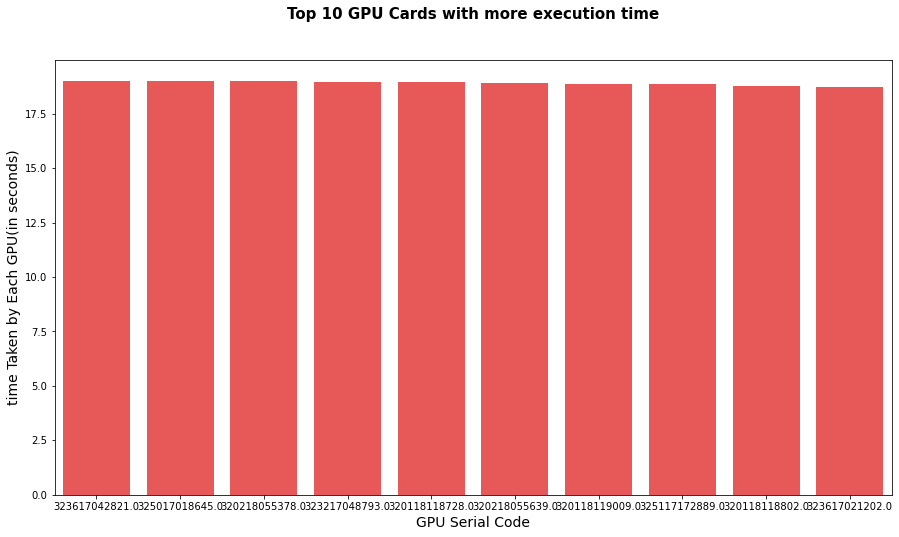

In [77]:
#Bar plot which clearly shows us the top 10 GPU's which has consumed more time while executing
plt.clf()
plt.subplots(figsize=(15,8))
GPU=sns.barplot(data=PerformanceTable_GPU, x="gpuSerial", y="EventTimeTaken",color = '#FF4040')
plt.title("Top 10 GPU Cards with more execution time\n\n", size=15,fontweight='bold')
plt.xlabel("GPU Serial Code", size = 14)
plt.ylabel("time Taken by Each GPU(in seconds)", size = 14)
plt.show()

The above table displays the top GPU’s and their performance time taken for completing a event. There’s sight time difference between each host completing its task. From the table SerialID 323617042821 has the highest mean Performance time followed by SerialID 325017018645 as seen in the table. A Graphical representation of the table is displayed with the help of Bar plot.

In [78]:
CheckPointTBL

timestamp_EventStartTime  \
190313 2018-11-08 08:16:43.895000+00:00   
283469 2018-11-08 07:47:22.860000+00:00   
283468 2018-11-08 07:47:22.863000+00:00   
100120 2018-11-08 08:06:41.657000+00:00   
100049 2018-11-08 08:06:41.657000+00:00   
...                                 ...   
218933 2018-11-08 07:43:33.460000+00:00   
218938 2018-11-08 07:43:30.381000+00:00   
277668 2018-11-08 08:00:45.782000+00:00   
194757 2018-11-08 08:19:59.217000+00:00   
229631 2018-11-08 08:13:37.033000+00:00   

                                      hostname      eventName  \
190313  04dc4e9647154250beeee51b866b0715000000         Tiling   
283469  04dc4e9647154250beeee51b866b0715000000  Saving Config   
283468  04dc4e9647154250beeee51b866b0715000000         Render   
100120  04dc4e9647154250beeee51b866b0715000000  Saving Config   
100049  04dc4e9647154250beeee51b866b0715000000    TotalRender   
...                                        ...            ...   
218933  e7adc42d28814e518e9601ac2329c51300001D         Render   
218938  e7adc42d28814e518e9601ac2329c51300001D      Uploading   
277668  e7adc42d28814e518e9601ac2329c51300001D      Uploading   
194757  e7adc42d28814e518e9601ac2329c51300001D         Render   
229631  e7adc42d28814e518e9601ac2329c51300001D      Uploading   

                                                  jobId  \
190313  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
283469  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
283468  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
100120  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
100049  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
...                                                 ...   
218933  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
218938  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
277668  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
194757  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   
229631  1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705   

                                      taskId          timestamp_EventStopTime  \
190313  a164499b-4bb8-42b7-9dc0-cf049b62731e 2018-11-08 08:16:44.897000+00:00   
283469  ffd69831-0ba4-457b-b8a8-e37c49779d94 2018-11-08 07:47:22.863000+00:00   
283468  ffd69831-0ba4-457b-b8a8-e37c49779d94 2018-11-08 07:47:55.554000+00:00   
100120  856b1c9e-8050-4648-b80e-172899cc586d 2018-11-08 08:06:41.659000+00:00   
100049  856b1c9e-8050-4648-b80e-172899cc586d 2018-11-08 08:07:26.785000+00:00   
...                                      ...                              ...   
218933  de595141-d9c8-4e35-ac71-f14d1c9ebe80 2018-11-08 07:44:20.792000+00:00   
218938  472afcae-6f17-43c1-8f1c-8df4116cfed7 2018-11-08 07:43:31.506000+00:00   
277668  4001ba74-396f-4c68-80cb-165723760b6a 2018-11-08 08:00:46.780000+00:00   
194757  4b2777ea-b877-498f-bace-43d867a86046 2018-11-08 08:20:33.780000+00:00   
229631  69bfa379-618d-4d74-b9ad-ddb7d7765837 2018-11-08 08:13:38.079000+00:00   

        EventTimeTaken  
190313           1.002  
283469           0.003  
283468          32.691  
100120           0.002  
100049          45.128  
...                ...  
218933          47.332  
218938           1.125  
277668           0.998  
194757          34.563  
229631           1.046  

[328965 rows x 7 columns]

In [79]:
DelayTable=CheckPointTBL[['hostname','eventName','taskId','timestamp_EventStartTime','timestamp_EventStopTime','jobId']].groupby(by=['hostname','taskId'],as_index=False).agg({'timestamp_EventStartTime':min,'timestamp_EventStopTime':max})
DelayTable.sort_values(by=['hostname','timestamp_EventStartTime'],inplace=True)


In [80]:
#Filtering the DelayTable to calculate delay time for a specific hostname
SingleCheckTable=DelayTable[DelayTable['hostname']=='04dc4e9647154250beeee51b866b0715000000']

In [81]:
SingleCheckTable=SingleCheckTable.reset_index(drop=True)

In [82]:
DelayTable

hostname  \
0      04dc4e9647154250beeee51b866b0715000000   
53     04dc4e9647154250beeee51b866b0715000000   
3      04dc4e9647154250beeee51b866b0715000000   
27     04dc4e9647154250beeee51b866b0715000000   
30     04dc4e9647154250beeee51b866b0715000000   
...                                       ...   
65762  e7adc42d28814e518e9601ac2329c51300001D   
65739  e7adc42d28814e518e9601ac2329c51300001D   
65754  e7adc42d28814e518e9601ac2329c51300001D   
65761  e7adc42d28814e518e9601ac2329c51300001D   
65756  e7adc42d28814e518e9601ac2329c51300001D   

                                     taskId         timestamp_EventStartTime  \
0      00390eee-c26c-41da-a02d-556bb7fcac67 2018-11-08 07:41:45.459000+00:00   
53     dbc599f6-694b-46c4-a864-e09ab881af37 2018-11-08 07:42:14.797000+00:00   
3      0ad8d29d-d30c-48c9-bd0a-fbea985464b2 2018-11-08 07:42:58.327000+00:00   
27     52881801-4d75-4ada-a118-682aa1d5ddf9 2018-11-08 07:43:43.296000+00:00   
30     5c14d761-26af-4602-a51d-6378a4ad7c24 2018-11-08 07:44:11.088000+00:00   
...                                     ...                              ...   
65762  79da2433-c40d-4353-9e2d-88aab362066f 2018-11-08 08:25:15.358000+00:00   
65739  25b6e321-73c0-4547-b6e8-454927e15ae5 2018-11-08 08:26:04.809000+00:00   
65754  5ea81ba4-f9b6-47c0-8fa8-149df0488d9b 2018-11-08 08:26:59.250000+00:00   
65761  7898c36a-1c41-442e-826d-b8884880dc2a 2018-11-08 08:27:58.303000+00:00   
65756  61250373-df16-43fd-a2aa-a542993385e1 2018-11-08 08:28:38.011000+00:00   

               timestamp_EventStopTime  
0     2018-11-08 07:42:11.268000+00:00  
53    2018-11-08 07:42:55.116000+00:00  
3     2018-11-08 07:43:41.318000+00:00  
27    2018-11-08 07:44:07.980000+00:00  
30    2018-11-08 07:44:57.193000+00:00  
...                                ...  
65762 2018-11-08 08:26:02.335000+00:00  
65739 2018-11-08 08:26:56.736000+00:00  
65754 2018-11-08 08:27:57.006000+00:00  
65761 2018-11-08 08:28:34.820000+00:00  
65756 2018-11-08 08:29:29.209000+00:00  

[65793 rows x 4 columns]

In [83]:
#Code to Calculate delay time for complete data
DelayTable=DelayTable.reset_index(drop=True)
InitialHostname=str(DelayTable['hostname'][0])
DelayTable['DelayedTime']=0.0
i=0
while(i<len(DelayTable)-1):
    if(InitialHostname==DelayTable['hostname'][i]):
        temp=DelayTable['timestamp_EventStartTime'][i+1]-DelayTable['timestamp_EventStopTime'][i]
        DelayTable['DelayedTime'][i]=temp.total_seconds()
        i+=1
    else:
        DelayTable['DelayedTime'][i-1]=0.0
        temp=DelayTable['timestamp_EventStartTime'][i+1]-DelayTable['timestamp_EventStopTime'][i]
        DelayTable['DelayedTime'][i]=temp.total_seconds()
        InitialHostname=DelayTable['hostname'][i]
        i+=1
    
        

In [84]:
#Code to calculate Delay time for a single hostname
t=[]
i=0
while(i<len(SingleCheckTable)):
    if(i+1>=len(SingleCheckTable)):
        break
    k=abs(SingleCheckTable['timestamp_EventStartTime'][i+1]-SingleCheckTable['timestamp_EventStopTime'][i])
    t.append({'DelayTime': k.total_seconds(), 'Hostname': SingleCheckTable['hostname'][i],'taskId': SingleCheckTable['taskId'][i]})
    #print('\n',t)
    #t.append(k,results_table_123['hostname'][i])
    i+=1
DelayTable_SingleHost = pd.DataFrame (t)

In [85]:
DelayTable

hostname  \
0      04dc4e9647154250beeee51b866b0715000000   
1      04dc4e9647154250beeee51b866b0715000000   
2      04dc4e9647154250beeee51b866b0715000000   
3      04dc4e9647154250beeee51b866b0715000000   
4      04dc4e9647154250beeee51b866b0715000000   
...                                       ...   
65788  e7adc42d28814e518e9601ac2329c51300001D   
65789  e7adc42d28814e518e9601ac2329c51300001D   
65790  e7adc42d28814e518e9601ac2329c51300001D   
65791  e7adc42d28814e518e9601ac2329c51300001D   
65792  e7adc42d28814e518e9601ac2329c51300001D   

                                     taskId         timestamp_EventStartTime  \
0      00390eee-c26c-41da-a02d-556bb7fcac67 2018-11-08 07:41:45.459000+00:00   
1      dbc599f6-694b-46c4-a864-e09ab881af37 2018-11-08 07:42:14.797000+00:00   
2      0ad8d29d-d30c-48c9-bd0a-fbea985464b2 2018-11-08 07:42:58.327000+00:00   
3      52881801-4d75-4ada-a118-682aa1d5ddf9 2018-11-08 07:43:43.296000+00:00   
4      5c14d761-26af-4602-a51d-6378a4ad7c24 2018-11-08 07:44:11.088000+00:00   
...                                     ...                              ...   
65788  79da2433-c40d-4353-9e2d-88aab362066f 2018-11-08 08:25:15.358000+00:00   
65789  25b6e321-73c0-4547-b6e8-454927e15ae5 2018-11-08 08:26:04.809000+00:00   
65790  5ea81ba4-f9b6-47c0-8fa8-149df0488d9b 2018-11-08 08:26:59.250000+00:00   
65791  7898c36a-1c41-442e-826d-b8884880dc2a 2018-11-08 08:27:58.303000+00:00   
65792  61250373-df16-43fd-a2aa-a542993385e1 2018-11-08 08:28:38.011000+00:00   

               timestamp_EventStopTime  DelayedTime  
0     2018-11-08 07:42:11.268000+00:00        3.529  
1     2018-11-08 07:42:55.116000+00:00        3.211  
2     2018-11-08 07:43:41.318000+00:00        1.978  
3     2018-11-08 07:44:07.980000+00:00        3.108  
4     2018-11-08 07:44:57.193000+00:00        2.980  
...                                ...          ...  
65788 2018-11-08 08:26:02.335000+00:00        2.474  
65789 2018-11-08 08:26:56.736000+00:00        2.514  
65790 2018-11-08 08:27:57.006000+00:00        1.297  
65791 2018-11-08 08:28:34.820000+00:00        3.191  
65792 2018-11-08 08:29:29.209000+00:00        0.000  

[65793 rows x 5 columns]

In order to calculate the efficiency, the initial pre-processed table is grouped in order by hostname, eventName,taskId, timestamp_EventStartTime, timestamp_EventStopTime, jobId. The result table is named DelayTable and this table is sorted based on hostname and timestamp_EventStartTime. Finally, logic is applied through Python programming to calculate the delay in between the host and the other. The graphical representation of the above calculated delay time is display below using a lineplot from the seaborn python library.

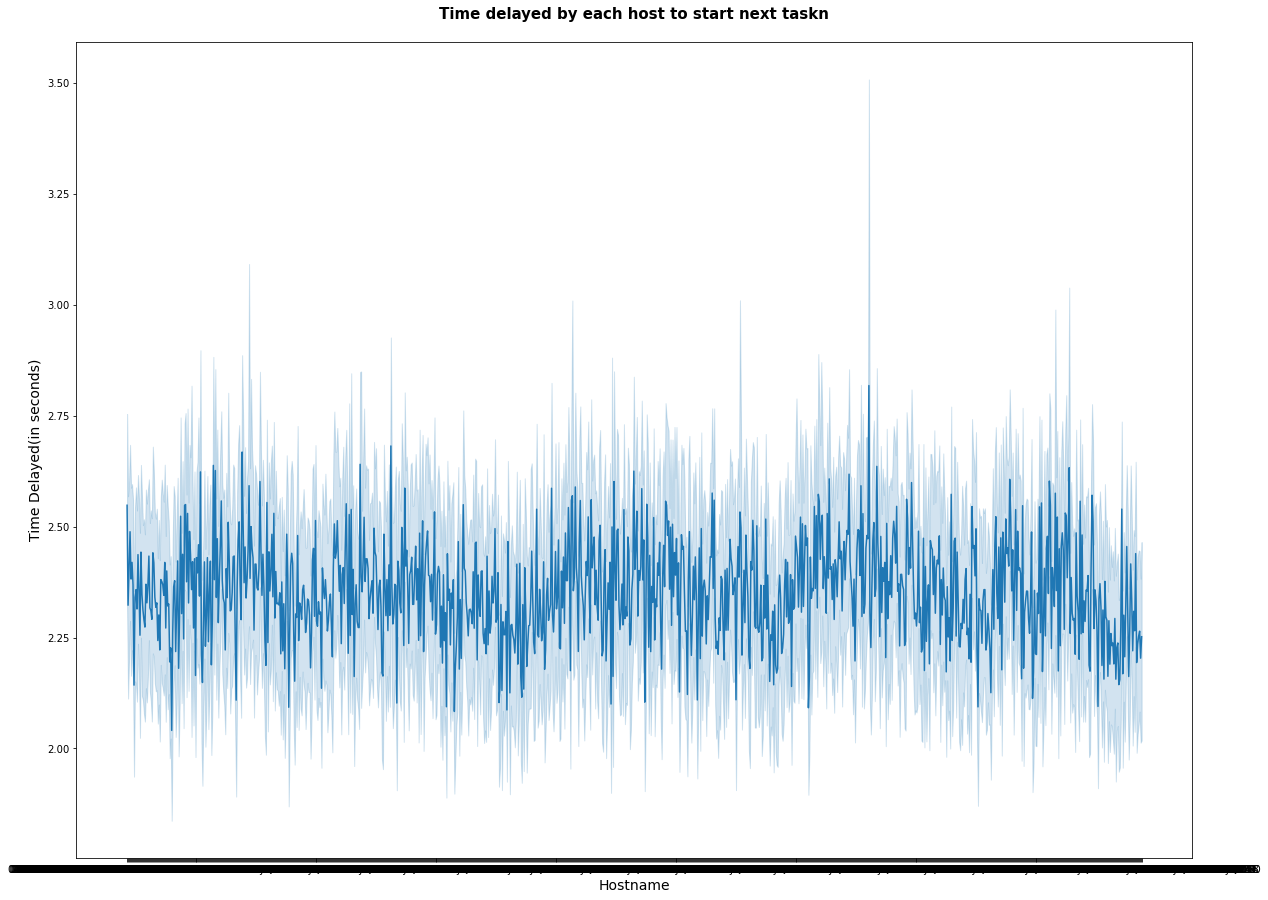

In [86]:
#Line plot for the calculated Delay time
plt.figure(figsize=(20,15))

sns.lineplot(data=DelayTable, x="hostname", y="DelayedTime")
plt.title("Time delayed by each host to start next taskn\n", size=15,fontweight='bold')
plt.xlabel("Hostname", size = 14)
plt.ylabel("Time Delayed(in seconds)", size = 14)
plt.show()